In [13]:
from tensorflow.keras.models import load_model
model = load_model('Brain_tumor_mobilenetV2.keras')

c:\Users\Saikat Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
import pickle 
with open('training_Mobile_netv2.pkl', 'rb') as file:
    history = pickle.load(file)
import matplotlib.pyplot as plt
import numpy as np

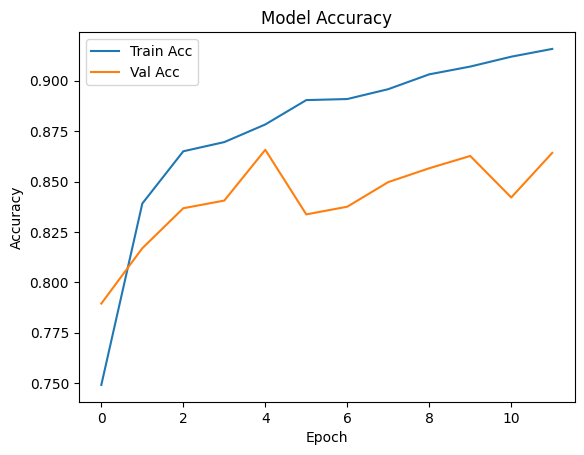

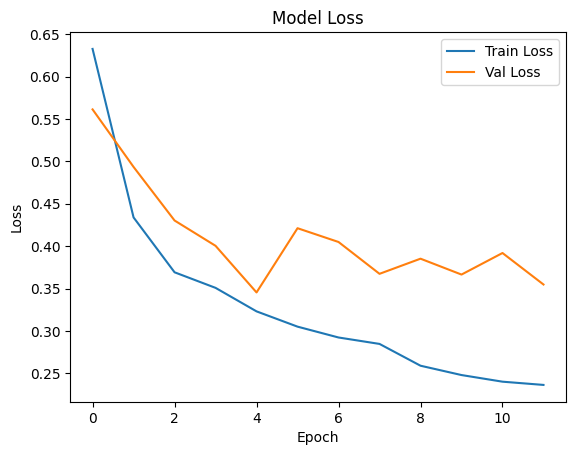

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# Evaluate the model
plt.plot(history['accuracy'], label='Train Acc')
plt.plot(history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
TEST_PATH = 'BrainTumor/Testing'
IMG_SIZE = 224

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predictions
y_pred_probs = model.predict(test_generator, steps=len(test_generator), verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Class names
class_names = list(test_generator.class_indices.keys())


Found 1311 images belonging to 4 classes.


c:\Users\Saikat Mondal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 350ms/step


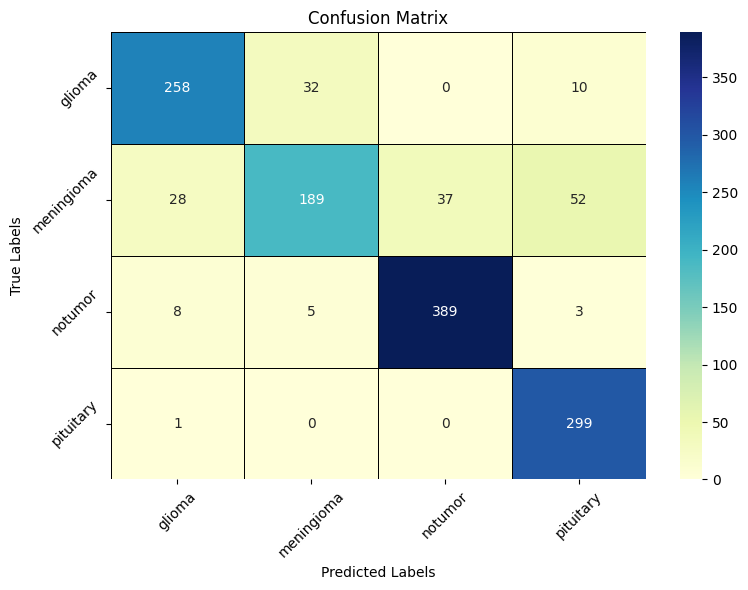

In [8]:
# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, linecolor='black',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


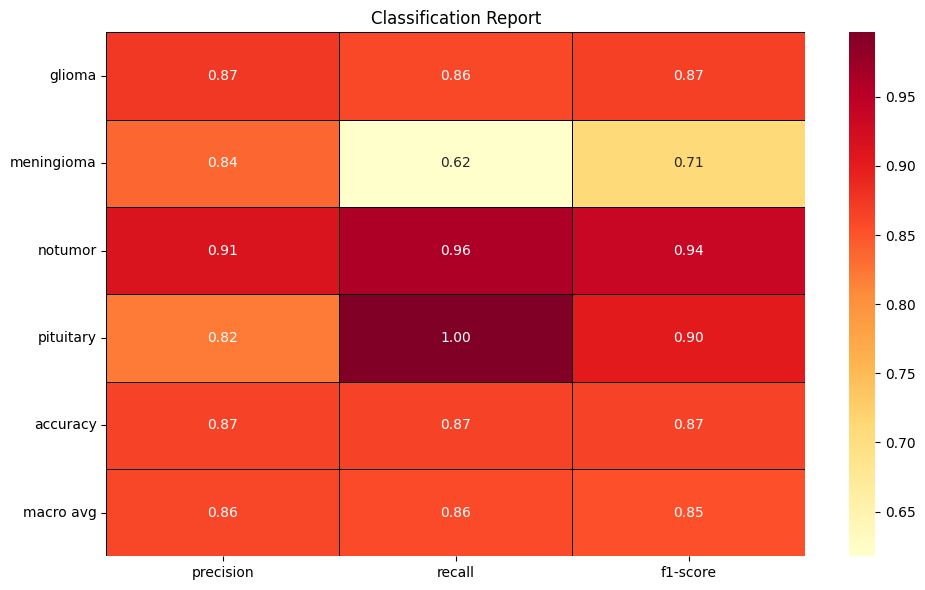

In [9]:
# Classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlOrRd', linewidths=0.5, linecolor='black', fmt='.2f')
plt.title('Classification Report')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


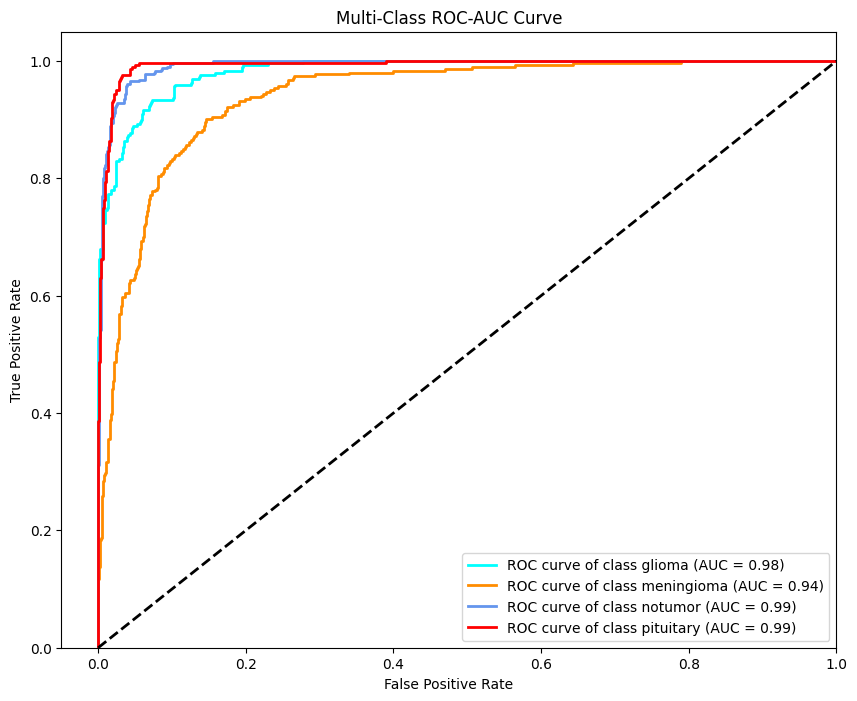

In [10]:
from sklearn.metrics import roc_auc_score

# Binarize true labels for ROC curve (multi-class one-vs-rest)
y_true_bin = label_binarize(y_true, classes=list(range(len(class_names))))
n_classes = y_true_bin.shape[1]

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10,8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()


In [11]:
# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator), verbose=1)

# Print accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.8258 - loss: 0.4227
Test Accuracy: 86.58%


In [15]:
# Last epoch's training and validation accuracy
final_train_acc = history['accuracy'][-1]
final_val_acc = history['val_accuracy'][-1]

# Print nicely
print(f"Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc * 100:.2f}%")


Final Training Accuracy: 91.58%
Final Validation Accuracy: 86.42%
